In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from utils.student_graph_generation import LouvainMachine

In [2]:
from utils.student_graph_generation import StudentGraphGenerator

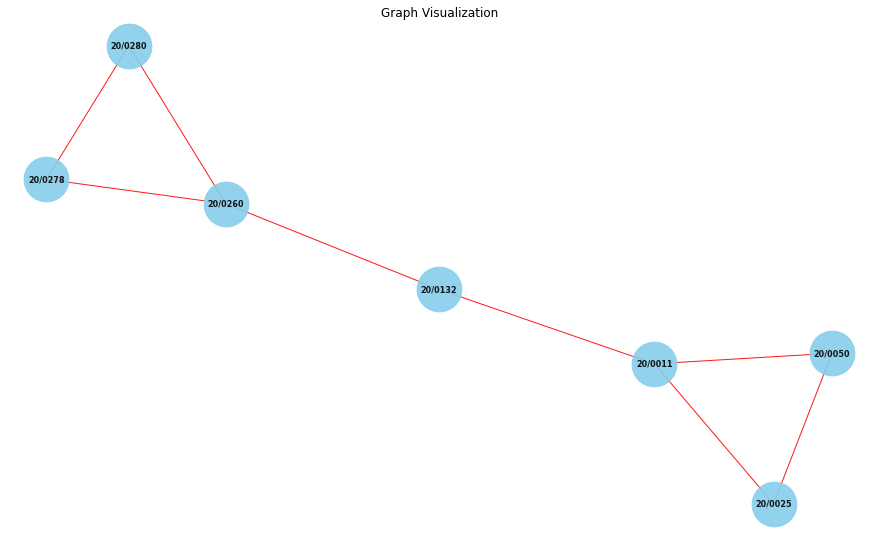

In [3]:
generator = StudentGraphGenerator('./../data/student_list.csv')


generator.consider_team_data_source('HPC', './../data/DATA_HPC.txt')
generator.consider_team_data_source('BI', './../data/DATA_TP_BI.txt')
generator.consider_team_data_source('BI', './../data/DATA_TP_MASD.txt')

# as as many data sources as you want
# generator.consider_team_data_source('HPC', './../data/DATA_HPC.txt')

# print data sources if you want
# generator.print_data_sources()

# this is necessary to assemble the different data sources 
# into on exploitable data structure
generator.consider_constraint([
    '20/0280','20/0278', '20/0011', '20/0132', '20/0050', '20/0025', '20/0260'
])
generator._generate_collaborations_list()

# generate binary graph, either worked together or not
generator.generate_graph(mode='binary')
generator.draw_graph_binary(save_option=True, save_path='./../data/figures/figure.png')
# save the graph into a pickle file
generator.export_binary_graph(export_path='./../data/graph_pickle/GRAPH0055.pkl')

# change the code above as you want

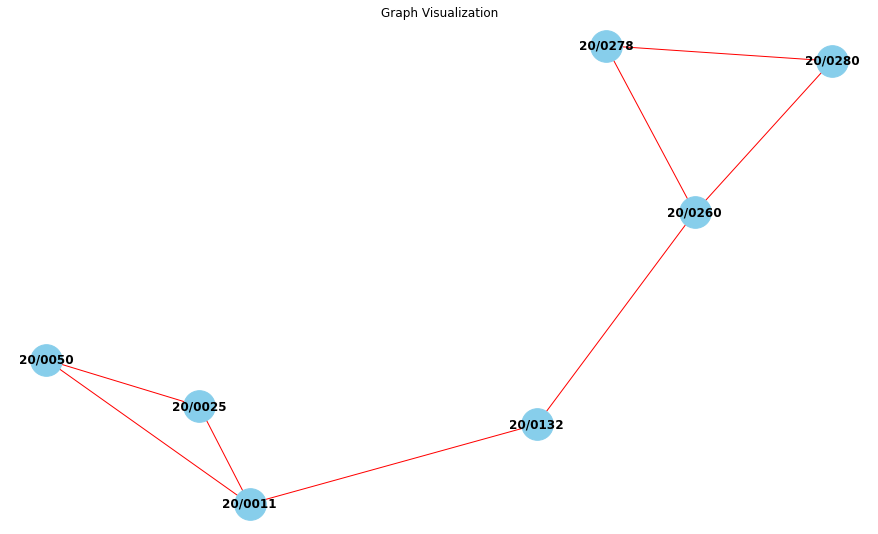

In [4]:


# generate weighted graph,
# it considers the number of times students worked together
generator.generate_graph(mode='weighted')
generator.draw_graph_weighted()
generator.export_weighted_graph(export_path='./../data/graph_pickle/GRAPH00_weighted.pkl')


In [5]:
louvain = LouvainMachine(generator.generated_binary_graph)
louvain.print_status()

>> Called constructor LouvainMachine: created graph with nodes:
['20/0050', '20/0011', '20/0260', '20/0132', '20/0280', '20/0025', '20/0278']
{'20/0050': {'community': '20/0050', 'people_nodes': ['20/0050']}, '20/0011': {'community': '20/0011', 'people_nodes': ['20/0011']}, '20/0260': {'community': '20/0260', 'people_nodes': ['20/0260']}, '20/0132': {'community': '20/0132', 'people_nodes': ['20/0132']}, '20/0280': {'community': '20/0280', 'people_nodes': ['20/0280']}, '20/0025': {'community': '20/0025', 'people_nodes': ['20/0025']}, '20/0278': {'community': '20/0278', 'people_nodes': ['20/0278']}}
---------------------------------------------------------------
created graph with edges:
[('20/0050', '20/0011'), ('20/0050', '20/0025'), ('20/0011', '20/0025'), ('20/0011', '20/0132'), ('20/0260', '20/0132'), ('20/0260', '20/0280'), ('20/0260', '20/0278'), ('20/0280', '20/0278')]
---------------------------------------------------------------
Solver State:
Nodes:
['20/0050', '20/0011', '20/

In [6]:



# louvain.solve_communities()
# result = louvain.forward_louvain()
# print('there is progress :', result)
# louvain.print_status()

In [7]:
louvain.solve_communities()
print('len={}'.format(len(louvain.graph_history)))
louvain.display_graph_history_tables(lambda x: display(x))

neighbor communities ['20/0025', '20/0011']
node: 20/0050, source: 20/0050, destination: 20/0025, value: 0.125
choosing maximum action >>>>node: 20/0050, source: 20/0050, destination: 20/0025, value: 0.125
neighbor communities ['20/0132', '20/0025']
node: 20/0011, source: 20/0011, destination: 20/0025, value: 0.203125
choosing maximum action >>>>node: 20/0011, source: 20/0011, destination: 20/0025, value: 0.203125
neighbor communities ['20/0132', '20/0278', '20/0280']
node: 20/0260, source: 20/0260, destination: 20/0132, value: 0.125
choosing maximum action >>>>node: 20/0260, source: 20/0260, destination: 20/0132, value: 0.125
neighbor communities ['20/0132', '20/0025']
node: 20/0132, source: 20/0132, destination: 20/0132, value: 0.09375
choosing maximum action >>>>node: 20/0132, source: 20/0132, destination: 20/0132, value: 0.09375
neighbor communities ['20/0132', '20/0278']
node: 20/0280, source: 20/0280, destination: 20/0278, value: 0.125
choosing maximum action >>>>node: 20/0280, s

,nodes,community,people_nodes
0,20/0050,20/0050,[20/0050]
1,20/0011,20/0011,[20/0011]
2,20/0260,20/0260,[20/0260]
3,20/0132,20/0132,[20/0132]
4,20/0280,20/0280,[20/0280]
5,20/0025,20/0025,[20/0025]
6,20/0278,20/0278,[20/0278]


,edges,node_a,node_b,weight
0,1,20/0050,20/0011,1
1,2,20/0050,20/0025,1
2,3,20/0011,20/0025,1
3,4,20/0011,20/0132,1
4,5,20/0260,20/0132,1
5,6,20/0260,20/0280,1
6,7,20/0260,20/0278,1
7,8,20/0280,20/0278,1


______________________________________________________________
---------------Possible actions for node 20/0050 in phase 1---------------


,node,source,destination,value
0,20/0050,20/0050,20/0025,0.125
1,20/0050,20/0050,20/0011,0.125


the action among the previous actions that maximizes modularity gain is:
node: 20/0050, source: 20/0050, destination: 20/0025, value: 0.125
---------------Possible actions for node 20/0011 in phase 1---------------


,node,source,destination,value
0,20/0011,20/0011,20/0132,0.125000
1,20/0011,20/0011,20/0025,0.203125


the action among the previous actions that maximizes modularity gain is:
node: 20/0011, source: 20/0011, destination: 20/0025, value: 0.203125
---------------Possible actions for node 20/0260 in phase 1---------------


,node,source,destination,value
0,20/0260,20/0260,20/0132,0.125
1,20/0260,20/0260,20/0278,0.125
2,20/0260,20/0260,20/0280,0.125


the action among the previous actions that maximizes modularity gain is:
node: 20/0260, source: 20/0260, destination: 20/0132, value: 0.125
---------------Possible actions for node 20/0132 in phase 1---------------


,node,source,destination,value
0,20/0132,20/0132,20/0132,0.09375
1,20/0132,20/0132,20/0025,0.03125


the action among the previous actions that maximizes modularity gain is:
node: 20/0132, source: 20/0132, destination: 20/0132, value: 0.09375
---------------Possible actions for node 20/0280 in phase 1---------------


,node,source,destination,value
0,20/0280,20/0280,20/0132,0.09375
1,20/0280,20/0280,20/0278,0.12500


the action among the previous actions that maximizes modularity gain is:
node: 20/0280, source: 20/0280, destination: 20/0278, value: 0.125
---------------Possible actions for node 20/0025 in phase 1---------------


,node,source,destination,value
0,20/0025,20/0025,20/0025,0.15625


the action among the previous actions that maximizes modularity gain is:
node: 20/0025, source: 20/0025, destination: 20/0025, value: 0.15625
---------------Possible actions for node 20/0278 in phase 1---------------


,node,source,destination,value
0,20/0278,20/0278,20/0132,0.09375
1,20/0278,20/0278,20/0278,0.09375


the action among the previous actions that maximizes modularity gain is:
node: 20/0278, source: 20/0278, destination: 20/0132, value: 0.09375
displayed possible actions for all the nodes in phase: 1
----------------------------------------------------------------


--------------------------Graph in the phase: 2--------------------------


,nodes,community,people_nodes
0,20/0025,20/0025,"[20/0050, 20/0011, 20/0025]"
1,20/0132,20/0132,"[20/0260, 20/0132, 20/0278]"
2,20/0278,20/0278,[20/0280]


,edges,node_a,node_b,weight
0,1,20/0025,20/0025,3
1,2,20/0025,20/0132,1
2,3,20/0132,20/0132,2
3,4,20/0132,20/0278,2


______________________________________________________________
---------------Possible actions for node 20/0025 in phase 2---------------


,node,source,destination,value
0,20/0025,20/0025,20/0132,0.0000
1,20/0025,20/0025,20/0025,0.1875


the action among the previous actions that maximizes modularity gain is:
node: 20/0025, source: 20/0025, destination: 20/0025, value: 0.1875
---------------Possible actions for node 20/0132 in phase 2---------------


,node,source,destination,value
0,20/0132,20/0132,20/0132,0.093750
1,20/0132,20/0132,20/0025,-0.109375
2,20/0132,20/0132,20/0278,0.250000


the action among the previous actions that maximizes modularity gain is:
node: 20/0132, source: 20/0132, destination: 20/0278, value: 0.25
---------------Possible actions for node 20/0278 in phase 2---------------


,node,source,destination,value
0,20/0278,20/0278,20/0278,0.125


the action among the previous actions that maximizes modularity gain is:
node: 20/0278, source: 20/0278, destination: 20/0278, value: 0.125
displayed possible actions for all the nodes in phase: 2
----------------------------------------------------------------


--------------------------Graph in the phase: 3--------------------------


,nodes,community,people_nodes
0,20/0025,20/0025,"[20/0050, 20/0011, 20/0025]"
1,20/0278,20/0278,"[20/0260, 20/0132, 20/0278, 20/0280]"


,edges,node_a,node_b,weight
0,1,20/0025,20/0025,3
1,2,20/0025,20/0278,1
2,3,20/0278,20/0278,4


______________________________________________________________
---------------Possible actions for node 20/0025 in phase 3---------------


,node,source,destination,value
0,20/0025,20/0025,20/0025,0.1875
1,20/0025,20/0025,20/0278,-0.1250


the action among the previous actions that maximizes modularity gain is:
node: 20/0025, source: 20/0025, destination: 20/0025, value: 0.1875
---------------Possible actions for node 20/0278 in phase 3---------------


,node,source,destination,value
0,20/0278,20/0278,20/0025,-0.109375
1,20/0278,20/0278,20/0278,0.187500


the action among the previous actions that maximizes modularity gain is:
node: 20/0278, source: 20/0278, destination: 20/0278, value: 0.1875
displayed possible actions for all the nodes in phase: 3
----------------------------------------------------------------


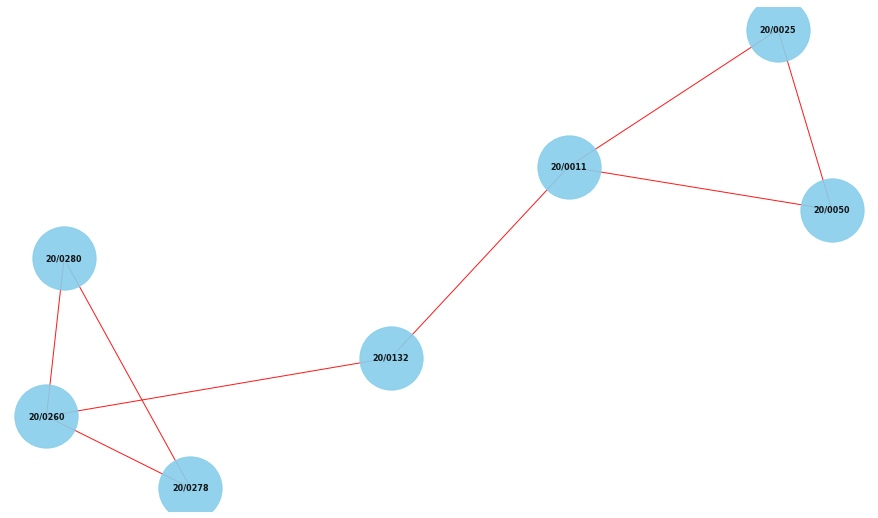

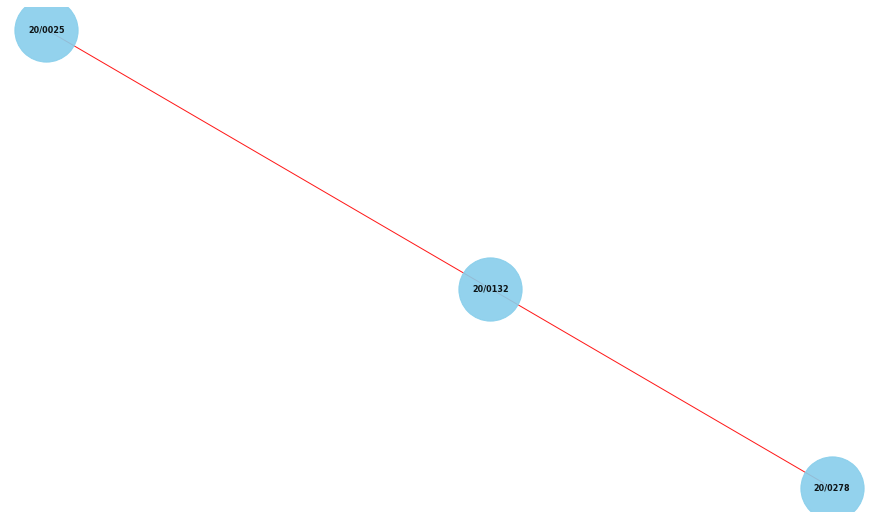

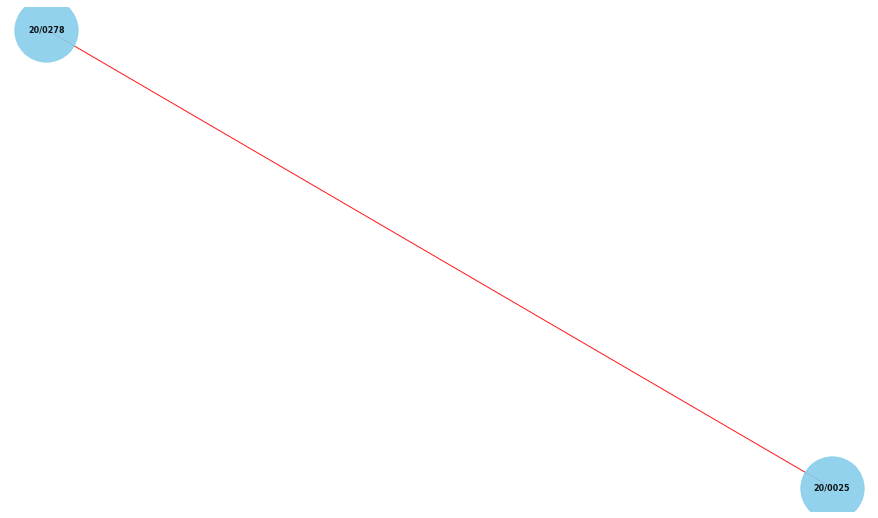

In [8]:
for g in louvain.graph_history:
    plt.figure(figsize=(12, 7))
    nx.draw(
            g,
            with_labels=True,
            alpha=0.9,
            pos=nx.spring_layout(g, k=0.9),
            node_color='skyblue',
            node_size=4000, 
            font_size=8, 
            font_color='black', 
            font_weight='bold',
            edge_color='red', width=1
            )
    plt.show()

In [9]:
louvain.display_graph_history_tables(
        display_fn = lambda x: display(x)
)


--------------------------Graph in the phase: 1--------------------------


,nodes,community,people_nodes
0,20/0050,20/0050,[20/0050]
1,20/0011,20/0011,[20/0011]
2,20/0260,20/0260,[20/0260]
3,20/0132,20/0132,[20/0132]
4,20/0280,20/0280,[20/0280]
5,20/0025,20/0025,[20/0025]
6,20/0278,20/0278,[20/0278]


,edges,node_a,node_b,weight
0,1,20/0050,20/0011,1
1,2,20/0050,20/0025,1
2,3,20/0011,20/0025,1
3,4,20/0011,20/0132,1
4,5,20/0260,20/0132,1
5,6,20/0260,20/0280,1
6,7,20/0260,20/0278,1
7,8,20/0280,20/0278,1


______________________________________________________________
---------------Possible actions for node 20/0050 in phase 1---------------


,node,source,destination,value
0,20/0050,20/0050,20/0025,0.125
1,20/0050,20/0050,20/0011,0.125


the action among the previous actions that maximizes modularity gain is:
node: 20/0050, source: 20/0050, destination: 20/0025, value: 0.125
---------------Possible actions for node 20/0011 in phase 1---------------


,node,source,destination,value
0,20/0011,20/0011,20/0132,0.125000
1,20/0011,20/0011,20/0025,0.203125


the action among the previous actions that maximizes modularity gain is:
node: 20/0011, source: 20/0011, destination: 20/0025, value: 0.203125
---------------Possible actions for node 20/0260 in phase 1---------------


,node,source,destination,value
0,20/0260,20/0260,20/0132,0.125
1,20/0260,20/0260,20/0278,0.125
2,20/0260,20/0260,20/0280,0.125


the action among the previous actions that maximizes modularity gain is:
node: 20/0260, source: 20/0260, destination: 20/0132, value: 0.125
---------------Possible actions for node 20/0132 in phase 1---------------


,node,source,destination,value
0,20/0132,20/0132,20/0132,0.09375
1,20/0132,20/0132,20/0025,0.03125


the action among the previous actions that maximizes modularity gain is:
node: 20/0132, source: 20/0132, destination: 20/0132, value: 0.09375
---------------Possible actions for node 20/0280 in phase 1---------------


,node,source,destination,value
0,20/0280,20/0280,20/0132,0.09375
1,20/0280,20/0280,20/0278,0.12500


the action among the previous actions that maximizes modularity gain is:
node: 20/0280, source: 20/0280, destination: 20/0278, value: 0.125
---------------Possible actions for node 20/0025 in phase 1---------------


,node,source,destination,value
0,20/0025,20/0025,20/0025,0.15625


the action among the previous actions that maximizes modularity gain is:
node: 20/0025, source: 20/0025, destination: 20/0025, value: 0.15625
---------------Possible actions for node 20/0278 in phase 1---------------


,node,source,destination,value
0,20/0278,20/0278,20/0132,0.09375
1,20/0278,20/0278,20/0278,0.09375


the action among the previous actions that maximizes modularity gain is:
node: 20/0278, source: 20/0278, destination: 20/0132, value: 0.09375
displayed possible actions for all the nodes in phase: 1
----------------------------------------------------------------


--------------------------Graph in the phase: 2--------------------------


,nodes,community,people_nodes
0,20/0025,20/0025,"[20/0050, 20/0011, 20/0025]"
1,20/0132,20/0132,"[20/0260, 20/0132, 20/0278]"
2,20/0278,20/0278,[20/0280]


,edges,node_a,node_b,weight
0,1,20/0025,20/0025,3
1,2,20/0025,20/0132,1
2,3,20/0132,20/0132,2
3,4,20/0132,20/0278,2


______________________________________________________________
---------------Possible actions for node 20/0025 in phase 2---------------


,node,source,destination,value
0,20/0025,20/0025,20/0132,0.0000
1,20/0025,20/0025,20/0025,0.1875


the action among the previous actions that maximizes modularity gain is:
node: 20/0025, source: 20/0025, destination: 20/0025, value: 0.1875
---------------Possible actions for node 20/0132 in phase 2---------------


,node,source,destination,value
0,20/0132,20/0132,20/0132,0.093750
1,20/0132,20/0132,20/0025,-0.109375
2,20/0132,20/0132,20/0278,0.250000


the action among the previous actions that maximizes modularity gain is:
node: 20/0132, source: 20/0132, destination: 20/0278, value: 0.25
---------------Possible actions for node 20/0278 in phase 2---------------


,node,source,destination,value
0,20/0278,20/0278,20/0278,0.125


the action among the previous actions that maximizes modularity gain is:
node: 20/0278, source: 20/0278, destination: 20/0278, value: 0.125
displayed possible actions for all the nodes in phase: 2
----------------------------------------------------------------


--------------------------Graph in the phase: 3--------------------------


,nodes,community,people_nodes
0,20/0025,20/0025,"[20/0050, 20/0011, 20/0025]"
1,20/0278,20/0278,"[20/0260, 20/0132, 20/0278, 20/0280]"


,edges,node_a,node_b,weight
0,1,20/0025,20/0025,3
1,2,20/0025,20/0278,1
2,3,20/0278,20/0278,4


______________________________________________________________
---------------Possible actions for node 20/0025 in phase 3---------------


,node,source,destination,value
0,20/0025,20/0025,20/0025,0.1875
1,20/0025,20/0025,20/0278,-0.1250


the action among the previous actions that maximizes modularity gain is:
node: 20/0025, source: 20/0025, destination: 20/0025, value: 0.1875
---------------Possible actions for node 20/0278 in phase 3---------------


,node,source,destination,value
0,20/0278,20/0278,20/0025,-0.109375
1,20/0278,20/0278,20/0278,0.187500


the action among the previous actions that maximizes modularity gain is:
node: 20/0278, source: 20/0278, destination: 20/0278, value: 0.1875
displayed possible actions for all the nodes in phase: 3
----------------------------------------------------------------



In [10]:
louvain.forward_louvain()

neighbor communities ['20/0025', '20/0278']
node: 20/0025, source: 20/0025, destination: 20/0025, value: 0.1875
choosing maximum action >>>>node: 20/0025, source: 20/0025, destination: 20/0025, value: 0.1875
neighbor communities ['20/0025', '20/0278']
node: 20/0278, source: 20/0278, destination: 20/0278, value: 0.1875
choosing maximum action >>>>node: 20/0278, source: 20/0278, destination: 20/0278, value: 0.1875
called louvain_assign, got the following value for improvement:  True

{'20/0025': {'community': '20/0025', 'people_nodes': ['20/0050', '20/0011', '20/0025']}, '20/0278': {'community': '20/0278', 'people_nodes': ['20/0260', '20/0132', '20/0278', '20/0280']}}
adding edges from necessary


False